
# Linear Programming Example: Windsor Glass Company

## Problem Statement

The Windsor Glass Company wants to determine the optimal mix of two products to maximize profit, given plant time constraints.

- **Product 1:** 8-foot glass door with aluminum frame
- **Product 2:** 4x6 foot wood-framed window

Three plants:
- Plant 1: Aluminum frames
- Plant 2: Wood frames
- Plant 3: Glass & assembly

| Plant   | Product 1 (hrs) | Product 2 (hrs) | Available hrs |
|---------|-----------------|-----------------|--------------|
| Plant 1 |       1         |       0         |      4       |
| Plant 2 |       0         |       2         |     12       |
| Plant 3 |       3         |       2         |     18       |

Profit per unit:
- Product 1: $3,000
- Product 2: $5,000



## Step 1: Define Decision Variables

Let:
- $x_1$: number of Product 1 to produce
- $x_2$: number of Product 2 to produce



## Step 2: Write the Objective Function

Maximize profit:
$$
Z = 3x_1 + 5x_2
$$
(Profit in $1,000 units for simplicity)


## Step 3: Write the Constraints (and Understand Why)

Each **constraint** in our linear programming model represents a real-world limit—something that restricts how many products we can actually produce, based on available resources. In this case, each *plant* is a resource, and each plant has a certain number of hours available.

Let's translate the real-world production limits into mathematical constraints step by step:

---

### 1. **Plant 1 (Aluminum frames)**

- **What does Plant 1 do?**
  - Makes aluminum frames used only in **Product 1**.
- **How is Plant 1 used?**
  - Each unit of **Product 1** requires **1 hour** from Plant 1.
  - Each unit of **Product 2** requires **0 hours** from Plant 1 (it uses wood frames, not aluminum).
- **How much time is available?**
  - Plant 1 can provide at most **4 hours**.

**So, the constraint is:**
$$
1x_1 + 0x_2 \leq 4
$$

Where:  
- $x_1$ = number of Product 1 to make  
- $x_2$ = number of Product 2 to make  

**Interpretation:**  
> The *total time* used in Plant 1 for all products produced **cannot exceed** the 4 hours available.

**Simplified:**  
$$
x_1 \leq 4
$$

---

### 2. **Plant 2 (Wood frames)**

- **What does Plant 2 do?**
  - Makes wood frames used only in **Product 2**.
- **How is Plant 2 used?**
  - Each unit of **Product 1** requires **0 hours** from Plant 2.
  - Each unit of **Product 2** requires **2 hours** from Plant 2.
- **How much time is available?**
  - Plant 2 can provide at most **12 hours**.

**So, the constraint is:**
$$
0x_1 + 2x_2 \leq 12
$$

**Interpretation:**  
> The *total time* used in Plant 2 for all products produced **cannot exceed** the 12 hours available.

**Simplified:**  
$$
2x_2 \leq 12
$$

(Or $x_2 \leq 6$ if you divide both sides by 2, but above matches data table.)

---

### 3. **Plant 3 (Glass & Assembly)**

- **What does Plant 3 do?**
  - Produces glass and assembles both products.
- **How is Plant 3 used?**
  - Each unit of **Product 1** uses **3 hours** of Plant 3.
  - Each unit of **Product 2** uses **2 hours** of Plant 3.
- **How much time is available?**
  - Plant 3 can provide at most **18 hours**.

**So, the constraint is:**
$$
3x_1 + 2x_2 \leq 18
$$

**Interpretation:**  
> The *total time* Plant 3 spends producing and assembling all products **cannot exceed** 18 hours.

---

### **Summary Table (for reference):**

| Constraint              | Meaning                                             |
|-------------------------|-----------------------------------------------------|
| $x_1 \leq 4$            | Don’t exceed Plant 1's 4 available hours (Prod 1)   |
| $2x_2 \leq 12$          | Don’t exceed Plant 2's 12 available hours (Prod 2)  |
| $3x_1 + 2x_2 \leq 18$   | Don’t exceed Plant 3's 18 available hours (both)    |

---

> **In summary:**  
> Constraints are the “rules of the game.” They keep your solution realistic and practical, reflecting all the limits you face in the real world.


## Step 4: Formulate for Python (`scipy.optimize.linprog`)

Now that we have our mathematical model, let's prepare it for solution using Python's `scipy.optimize.linprog` function.

### **A. Why do we need to reformat our model?**

- Mathematical models (like we just wrote) are easy for humans to read, but Python requires everything in a specific numerical format.
- The `linprog` function solves *minimization* problems by default. But our goal is to **maximize** profit. To handle this, we'll minimize the negative of our objective function (i.e., maximize $Z$ is equivalent to minimize $-Z$).

---

### **B. Decision Variables as a Vector**

Let’s define our variables as a vector:
$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
$$
where:
- $x_1$ = number of Product 1 to make
- $x_2$ = number of Product 2 to make

---

### **C. The Objective Function for Python**

Our original goal:
$$
\text{Maximize} \quad Z = 3x_1 + 5x_2
$$

For Python, we write:
$$
\text{Minimize} \quad -3x_1 - 5x_2
$$

So, our objective coefficients for `linprog` will be:
```python
c = [-3, -5]
```
---
### **D. Expressing Constraints as Arrays**

The constraints, written as math inequalities, are:

- $x_1 \leq 4$
- $x_2 \leq 6$  (derived from $2x_2 \leq 12$)
- $3x_1 + 2x_2 \leq 18$

In matrix (array) form for `linprog`, each constraint is a row:

$$
A =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
3 & 2 \\
\end{bmatrix}
$$

$$
b =
\begin{bmatrix}
4 \\
6 \\
18 \\
\end{bmatrix}
$$

- **A** contains the coefficients of $x_1$ and $x_2$ for each constraint.
- **b** contains the right-hand side values (the upper limits).

---

### **E. Variable Bounds**

We also tell Python that both decision variables can't be negative (i.e., $x_1 \geq 0$, $x_2 \geq 0$):

$$
x_1 \geq 0 \\
x_2 \geq 0
$$

Or, in Python code syntax:

```python
x0_bounds = (0, None)
x1_bounds = (0, None)


In [4]:

from scipy.optimize import linprog

# Objective coefficients (negative for maximization)
c = [-3, -5]

# Constraints matrix (left side coefficients)
A = [
    [1, 0],    # x1 <= 4 (Plant 1)
    [0, 1],    # x2 <= 6 (Plant 2)
    [3, 2]     # 3x1 + 2x2 <= 18 (Plant 3)
]
b = [4, 6, 18]

# Variable bounds (non-negative)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the problem
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

if res.success:
    print("Optimal solution found!")
    print(f"Number of Product 1 to produce (x1): {res.x[0]:.2f}")
    print(f"Number of Product 2 to produce (x2): {res.x[1]:.2f}")
    print(f"Maximum profit: ${-res.fun*1000:.2f}")
else:
    print("No optimal solution found.")


Optimal solution found!
Number of Product 1 to produce (x1): 2.00
Number of Product 2 to produce (x2): 6.00
Maximum profit: $36000.00



## Step 5: Interpret the Solution

- $x_1$: Optimal number of Product 1 (doors)
- $x_2$: Optimal number of Product 2 (windows)
- **Maximum profit:** (convert back from negative for maximization)

---

You can extend this notebook by visualizing the feasible region with matplotlib for extra understanding.


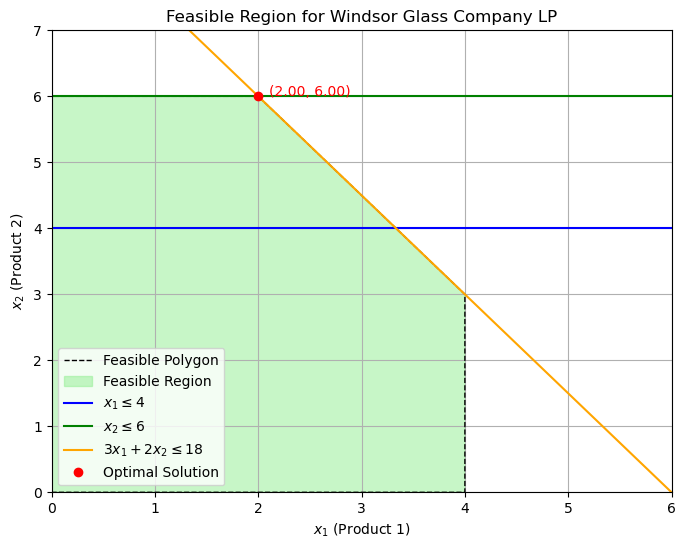

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Solve LP as before
c = [-3, -5]
A = [[1, 0], [0, 1], [3, 2]]
b = [4, 6, 18]
x1_bounds = (0, None)
x2_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')
x1_opt, x2_opt = res.x

# Vertices of feasible region (calculate intersection points)
vertices = [
    (0, 0),        # origin
    (4, 0),        # x1=4, x2=0
    (4, (18 - 3*4)/2),    # x1=4, intersection with 3x1+2x2=18
    (2, 6),        # intersection of x2=6 and 3x1+2x2=18
    (0, 6)         # x1=0, x2=6
]
polygon = np.array(vertices)

# Plot
plt.figure(figsize=(8, 6))
plt.plot([v[0] for v in vertices+[vertices[0]]], [v[1] for v in vertices+[vertices[0]]], 'k--', lw=1, label='Feasible Polygon')
plt.fill(polygon[:,0], polygon[:,1], color='lightgreen', alpha=0.5, label='Feasible Region')

# Constraints
x1 = np.linspace(0, 6, 300)
plt.plot(x1, 4*np.ones_like(x1), 'b-', label=r'$x_1 \leq 4$')
plt.plot(x1, 6*np.ones_like(x1), 'g-', label=r'$x_2 \leq 6$')
plt.plot(x1, (18 - 3*x1)/2, 'orange', label=r'$3x_1 + 2x_2 \leq 18$')

# Optimal solution
plt.plot(x1_opt, x2_opt, 'ro', label='Optimal Solution')
plt.text(x1_opt+0.1, x2_opt, f"({x1_opt:.2f}, {x2_opt:.2f})", color='red')

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel('$x_1$ (Product 1)')
plt.ylabel('$x_2$ (Product 2)')
plt.title('Feasible Region for Windsor Glass Company LP')
plt.legend()
plt.grid(True)
plt.show()



# Conclusion

This is a classic linear programming model: define variables, objective, constraints, solve numerically, and interpret.
 